# imports

In [1]:
import SRC.EDA as EDA


import data

In [2]:
cluster_data=EDA.EDA(force_file=False)

In [3]:
cluster_data.read_data("./SAMPLES/hdbscan.npy",label_cols=None,header=None,sep="\s+")

In [4]:
cluster_data.data

array([[-0.12153499, -0.22876337],
       [-0.22093687, -0.25251088],
       [ 0.1259037 , -0.27314321],
       ..., 
       [ 0.50243143, -0.3002958 ],
       [ 0.53822256,  0.19412199],
       [-0.08688887, -0.2092721 ]])

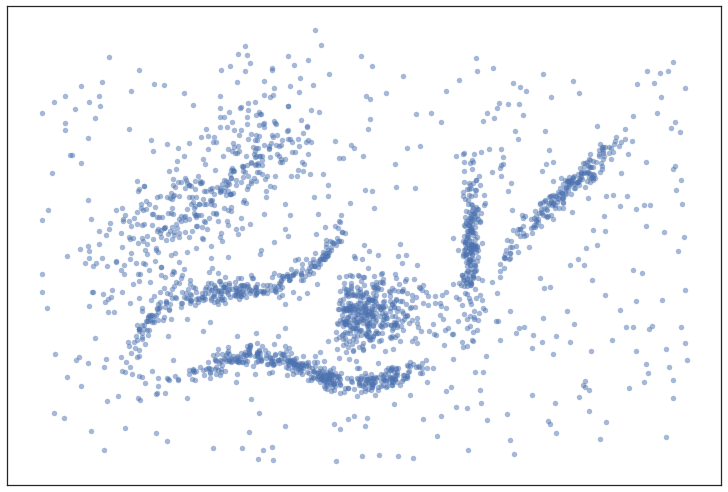

In [5]:
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1])


In [6]:
cluster_data.comp_distance_matrix()

In [7]:
from sklearn.cluster import SpectralClustering
spectral =  SpectralClustering(n_clusters=5)
labels_spec = spectral.fit_predict(cluster_data.data)
labels_spec
cluster_data.perform_spectral_clustering(no_clusters=5)

parameters : {'affinity': 'rbf', 'assign_labels': 'kmeans', 'coef0': 1, 'degree': 3, 'eigen_solver': None, 'eigen_tol': 0.0, 'gamma': 1.0, 'kernel_params': None, 'n_clusters': 5, 'n_init': 10, 'n_jobs': 1, 'n_neighbors': 10, 'random_state': None}
labels : [0 0 4 ..., 4 3 0]
n_clusters : 5
clusters : {0: 527, 1: 778, 2: 360, 3: 274, 4: 370}


In [8]:
spectral.get_params()


{'affinity': 'rbf',
 'assign_labels': 'kmeans',
 'coef0': 1,
 'degree': 3,
 'eigen_solver': None,
 'eigen_tol': 0.0,
 'gamma': 1.0,
 'kernel_params': None,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 1,
 'n_neighbors': 10,
 'random_state': None}

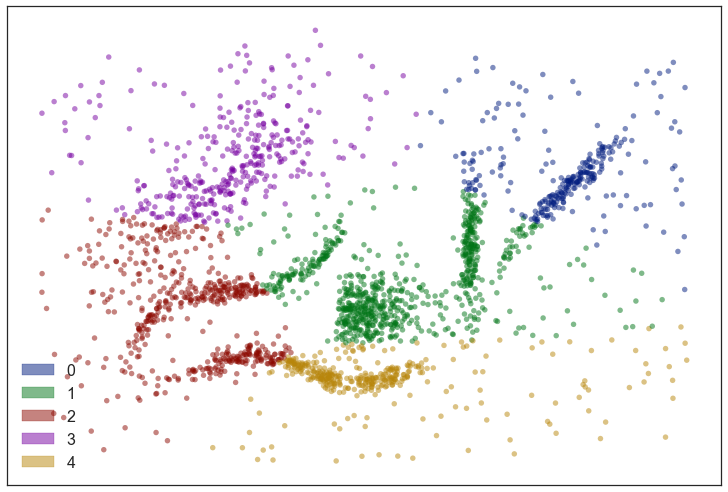

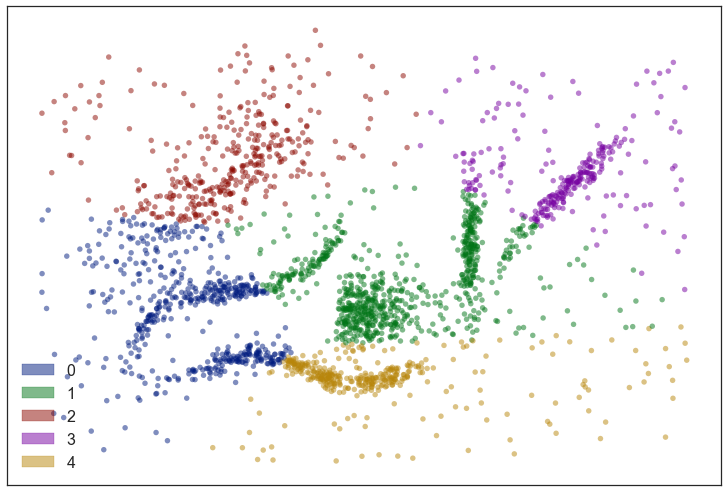

In [9]:
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],labels_spec)
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],cluster_data.spectral_results["labels"])

## Affinity matix from sklearn (spectral)

In [10]:
spectral.affinity_matrix_

array([[ 1.        ,  0.98960968,  0.93875995, ...,  0.67405001,
         0.54112117,  0.99842099],
       [ 0.98960968,  1.        ,  0.88627848, ...,  0.591233  ,
         0.46033354,  0.98035703],
       [ 0.93875995,  0.88627848,  1.        , ...,  0.86717854,
         0.67817927,  0.95183822],
       ..., 
       [ 0.67405001,  0.591233  ,  0.86717854, ...,  1.        ,
         0.78213341,  0.70076427],
       [ 0.54112117,  0.46033354,  0.67817927, ...,  0.78213341,
         1.        ,  0.57493914],
       [ 0.99842099,  0.98035703,  0.95183822, ...,  0.70076427,
         0.57493914,  1.        ]])

## Affinity matrix caluculated manually

In [11]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(cluster_data.data, n_neighbors=10,include_self=True)
affinity_matrix = 0.5 * (connectivity + connectivity.T)
affinity_matrix

<2309x2309 sparse matrix of type '<class 'numpy.float64'>'
	with 27837 stored elements in Compressed Sparse Row format>

### running spectral with manually calculated affinity matrix

In [12]:
specteral_manualy_n_neigh =  SpectralClustering(n_clusters=5,affinity='nearest_neighbors')
labels_spec_neigh = specteral_manualy_n_neigh.fit_predict(cluster_data.data)
spectral_manual = SpectralClustering(n_clusters=5,affinity='precomputed')
labels_manual = spectral_manual.fit_predict(affinity_matrix)
print(labels_manual)
print(labels_spec_neigh)

[3 3 3 ..., 2 2 3]
[4 4 4 ..., 2 2 4]


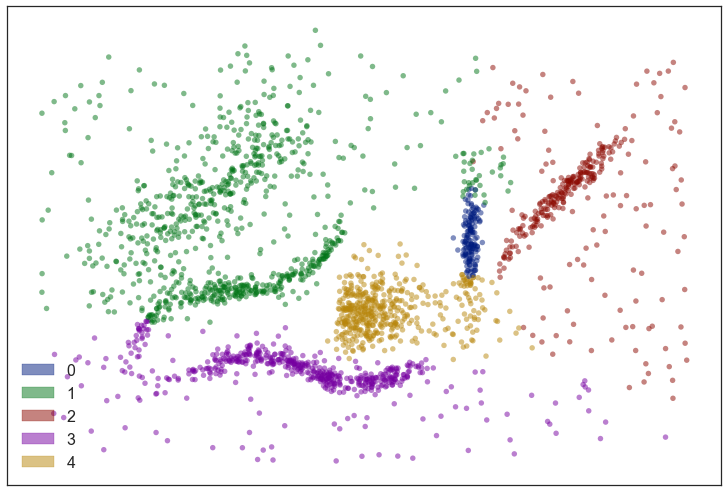

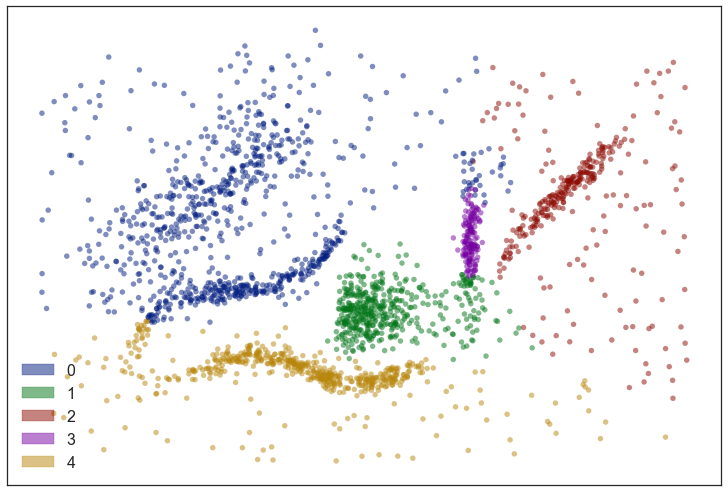

In [13]:
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],labels_manual)
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],labels_spec_neigh)

### calculating affinty using other method (rbf-manually) 

In [14]:
spectral_manual_1 = SpectralClustering(n_clusters=5,affinity='precomputed')
params = None
if params is None:
    params = {}
if not callable(spectral.affinity):
    params['gamma'] = 1
    params['degree'] = 3
    params['coef0'] = 1               
affinity_matrix_1 = pairwise_kernels(cluster_data.data, metric='rbf',filter_params=True,**params)
affinity_matrix_1

array([[ 1.        ,  0.98960968,  0.93875995, ...,  0.67405001,
         0.54112117,  0.99842099],
       [ 0.98960968,  1.        ,  0.88627848, ...,  0.591233  ,
         0.46033354,  0.98035703],
       [ 0.93875995,  0.88627848,  1.        , ...,  0.86717854,
         0.67817927,  0.95183822],
       ..., 
       [ 0.67405001,  0.591233  ,  0.86717854, ...,  1.        ,
         0.78213341,  0.70076427],
       [ 0.54112117,  0.46033354,  0.67817927, ...,  0.78213341,
         1.        ,  0.57493914],
       [ 0.99842099,  0.98035703,  0.95183822, ...,  0.70076427,
         0.57493914,  1.        ]])

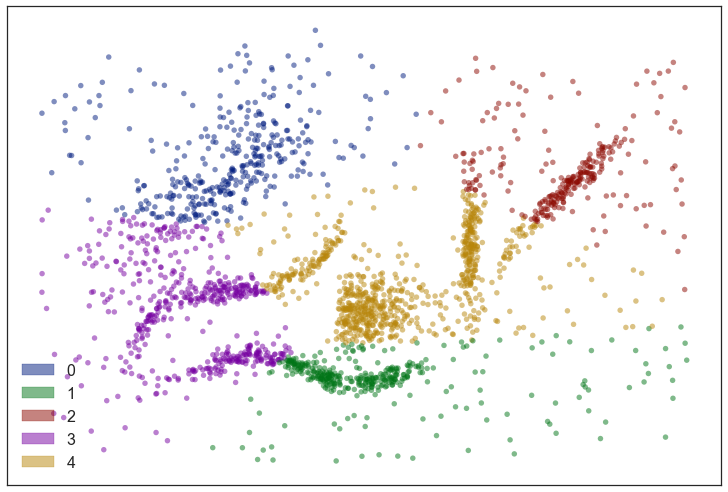

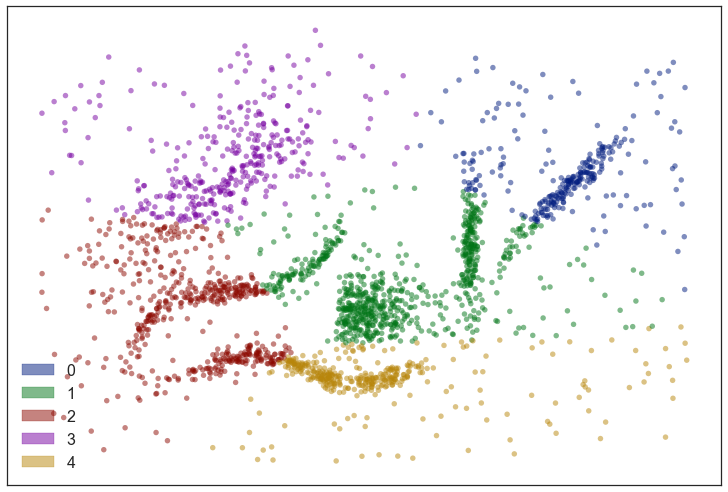

In [15]:
labels_manual_1 = spectral_manual_1.fit_predict(affinity_matrix_1)
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],labels_manual_1)
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],labels_spec)


## getting size of the variables holding the matrix

In [16]:
from sys import getsizeof
print(getsizeof(spectral.affinity_matrix_))
print(getsizeof(affinity_matrix_1))
print(getsizeof(affinity_matrix))
print(getsizeof(specteral_manualy_n_neigh.affinity_matrix_))


42651960
42651960
56
56


## Inference 
+ if we use rbf kernel to calc affinity matrix 
--broken  clustering , large matrix size
+ if we use nearest_neigh  to calc to affinity matrix 
-- better individual identification of  custers , small matrix size 

# Writing matrix(rbf) in a file and passing it to spectral 

## writing matrix in hdf5 file 

In [78]:
type(affinity_matrix_1)

numpy.ndarray

In [46]:
import h5py

In [85]:
df = h5py.File('test_aff_1_1.1.hdf5','w')


OSError: Unable to create file (Unable to truncate a file which is already open)

In [86]:
file_affinity = df.create_dataset(name='matrix', data=affinity_matrix_1)

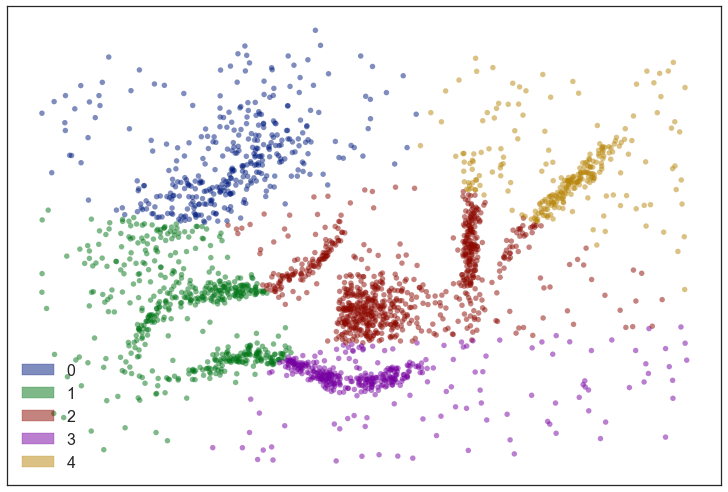

In [88]:
new_spec =  SpectralClustering(n_clusters=5,affinity='precomputed')
lab =  new_spec.fit_predict(file_affinity)
EDA.visualise_2D(cluster_data.data.T[0],cluster_data.data.T[1],lab)

In [91]:
print(getsizeof(file_affinity))
print(getsizeof(affinity_matrix_1))

56
42651960
